In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
# import seaborn as sns
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import glob as glob
# import arrow
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

In [4]:
dengues = glob.glob("temp/*.csv")
dengues = dengues[:-2]

In [5]:
list_ = []
for file_ in dengues:
    df = pd.read_csv(file_)
    list_.append(df)
    allDengue = np.concatenate(list_)

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity

In [6]:
allDengue_copy = allDengue.copy()
allDengue_copy[:,9] = allDengue_copy[:,9].astype('str')

In [7]:
def seperate(data,distinct):
    tmp = []
    for distinct_province in distinct:
        sub_tmp = []
        for data_province in data:
            if data_province[9][:2] == distinct_province:
                sub_tmp.append(data_province)
        sub_tmp = np.array(sub_tmp)
        tmp.append(sub_tmp)
    return np.array(tmp)

In [8]:
unique_province = [
                   '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '30', '31', '32', '33',
                   '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45',
                   '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
                   '57', '58', '60', '61', '62', '63', '64', '65', '66', '67', '70',
                   '71', '72', '73', '74', '75', '76', '77', '80', '81', '82', '83',
                   '84', '85', '86', '90', '91', '92', '93', '94', '95', '96'
                  ]
allProvinces = seperate(allDengue_copy,unique_province)

In [9]:
allProvinces_copy = allProvinces.copy()
allProvinces_copy = allProvinces_copy[:-1]

# temp = allProvinces_copy[0]
# for i in allProvinces_copy[:3]:
    
allProvinces_copy = np.concatenate(([i for i in allProvinces_copy[:]]),axis=0)

In [10]:
allProvinces_df = pd.DataFrame(allProvinces_copy)
allProvinces_df = allProvinces_df.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20],axis=1)
allProvinces_df.columns = ['โรค', 'รหัสจังหวัด', 'date']
allProvinces_df['รหัสจังหวัด'] = allProvinces_df['รหัสจังหวัด'].astype('str').str[:2]
allProvinces_df = allProvinces_df.sort_values(by='date')
allProvinces_df = allProvinces_df.drop(138990)
allProvinces_df = allProvinces_df.drop(168347)

In [11]:
allProvinces_df.head()

,โรค,รหัสจังหวัด,date
993666,26,95,2003-01-01
130450,26,11,2003-01-01
667297,66,60,2003-01-01
130478,26,11,2003-01-01
397,26,10,2003-01-01


In [12]:
import pickle
with open('/Users/JohnnyV/Desktop/Academic/CS/DataMining/project-trial/thailand.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [13]:
allProvinces_df = allProvinces_df[allProvinces_df['รหัสจังหวัด']!='na']
provinces = ([b.get(int(i)) for i in allProvinces_df['รหัสจังหวัด']])
allProvinces_df['จังหวัด'] = provinces

In [14]:
date_df = allProvinces_df.copy()

In [15]:
date_df.date

993666    2003-01-01
130450    2003-01-01
667297    2003-01-01
130478    2003-01-01
397       2003-01-01
828385    2003-01-01
932830    2003-01-01
982544    2003-01-01
732031    2003-01-01
666511    2003-01-01
932754    2003-01-01
666509    2003-01-01
468245    2003-01-01
5543      2003-01-01
778304    2003-01-01
5434      2003-01-01
756760    2003-01-01
2502      2003-01-01
831820    2003-01-01
993741    2003-01-01
353894    2003-01-01
972836    2003-01-01
2446      2003-01-01
972851    2003-01-01
907274    2003-01-01
425       2003-01-01
375407    2003-01-01
932427    2003-01-01
932429    2003-01-01
907494    2003-01-01
             ...    
828339    2015-12-31
993275    2015-12-31
993274    2015-12-31
981961    2015-12-31
981962    2015-12-31
374373    2015-12-31
982313    2015-12-31
352469    2015-12-31
616774    2015-12-31
631751    2015-12-31
965818    2015-12-31
274295    2015-12-31
274296    2015-12-31
278422    2015-12-31
279110    2015-12-31
687645    2015-12-31
292089    201

In [16]:
date_df.date = pd.DatetimeIndex(date_df.date)
# allProvinces_date_df.index = pd.PeriodIndex(date_df.date,freq='M')
date_df.index = date_df.date

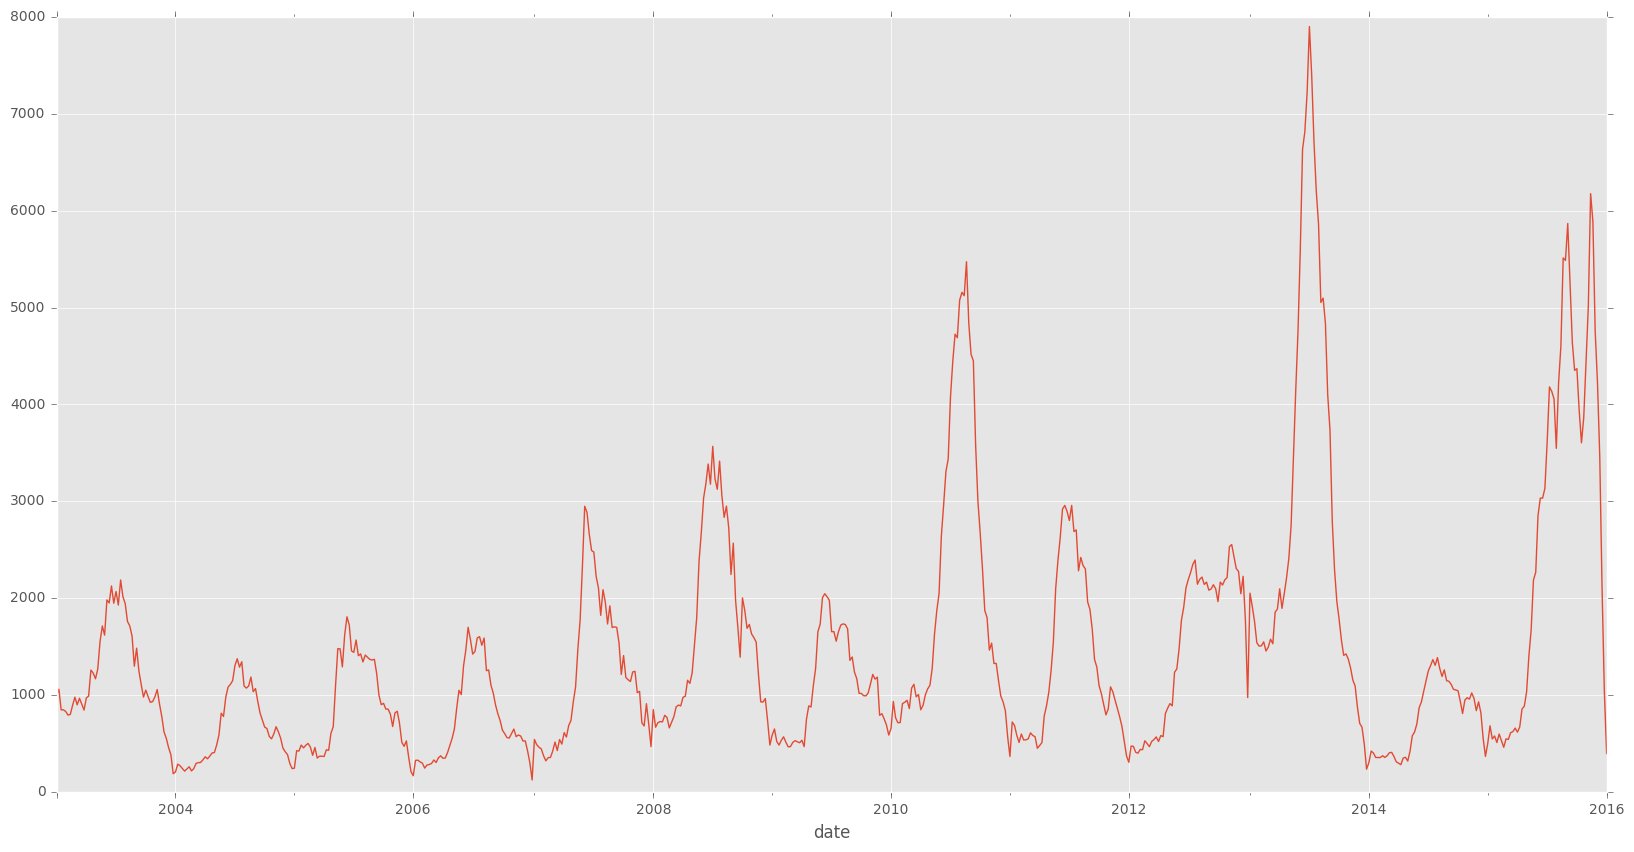

In [17]:
weekly_df = date_df.resample('W').size()
weekly_df.plot(kind='line',figsize=(20,10))

In [18]:
weekly_df = pd.DataFrame(weekly_df)
weekly_df.columns = ['cases']

In [19]:
weekly_df['date'] = weekly_df.index

In [20]:
weekly_df.date.min()

Timestamp('2003-01-05 00:00:00')

In [21]:
weekly_df["timeIndex"] = weekly_df.date - weekly_df.date.min()

In [22]:
weekly_df.head()

,cases,date,timeIndex
date,,,
2003-01-05,998,2003-01-05,0 days
2003-01-12,1060,2003-01-12,7 days
2003-01-19,847,2003-01-19,14 days
2003-01-26,848,2003-01-26,21 days
2003-02-02,830,2003-02-02,28 days


In [23]:
weekly_df['timeIndex'] = weekly_df['timeIndex']/np.timedelta64(1,'W')

In [24]:
weekly_df['timeIndex'] = weekly_df['timeIndex'].round(0).astype(int)

In [25]:
model_linear = smf.ols('cases ~ timeIndex', data = weekly_df).fit()

In [26]:
bkkCases = allProvinces_df[allProvinces_df['จังหวัด'] == "Bangkok"]
# allProvinces_df

In [27]:
bkkCases.head()

,โรค,รหัสจังหวัด,date,จังหวัด
397,26,10,2003-01-01,Bangkok
5543,26,10,2003-01-01,Bangkok
5434,26,10,2003-01-01,Bangkok
2502,26,10,2003-01-01,Bangkok
2446,27,10,2003-01-01,Bangkok


In [28]:
bkkCases = bkkCases.sort_values(by='date')
# bkkCases.index = pd.PeriodIndex(bkkCases.date, freq='M')

In [29]:
bkkCases['year'] = bkkCases['date'].astype('str').str[:4]

In [30]:
bkkCases['monthVal'] = pd.DatetimeIndex(bkkCases['date']).month

In [31]:
a = pd.DataFrame(bkkCases.groupby([bkkCases['year'],bkkCases['monthVal']]).size())


In [32]:
a.columns = ['bkk_freq']

In [33]:
yr = [i for i in range(3,15)]
mth = [i for i in range(1,13)]


In [34]:
yr_tmp = []
mth_tmp = []
freq_tmp = []
for idx, iele in enumerate(yr):
    for jdx, jele in enumerate(mth):
        yr_tmp.append(iele)
        mth_tmp.append(jele)

for i in a.bkk_freq:
    freq_tmp.append(i)

In [35]:
yr_tmp = np.array(yr_tmp)
mth_tmp = np.array(mth_tmp)
freq_tmp = np.array(freq_tmp)

In [36]:
bkk_df = pd.DataFrame(yr_tmp)
bkk_df['mth'] = pd.Series(mth_tmp)
bkk_df['freq'] = pd.Series(freq_tmp)
bkk_df.columns = ['yr','mth','freq']

In [37]:
bkk_pivot = pd.pivot_table(bkk_df, values = "freq", columns = "yr", index = "mth")

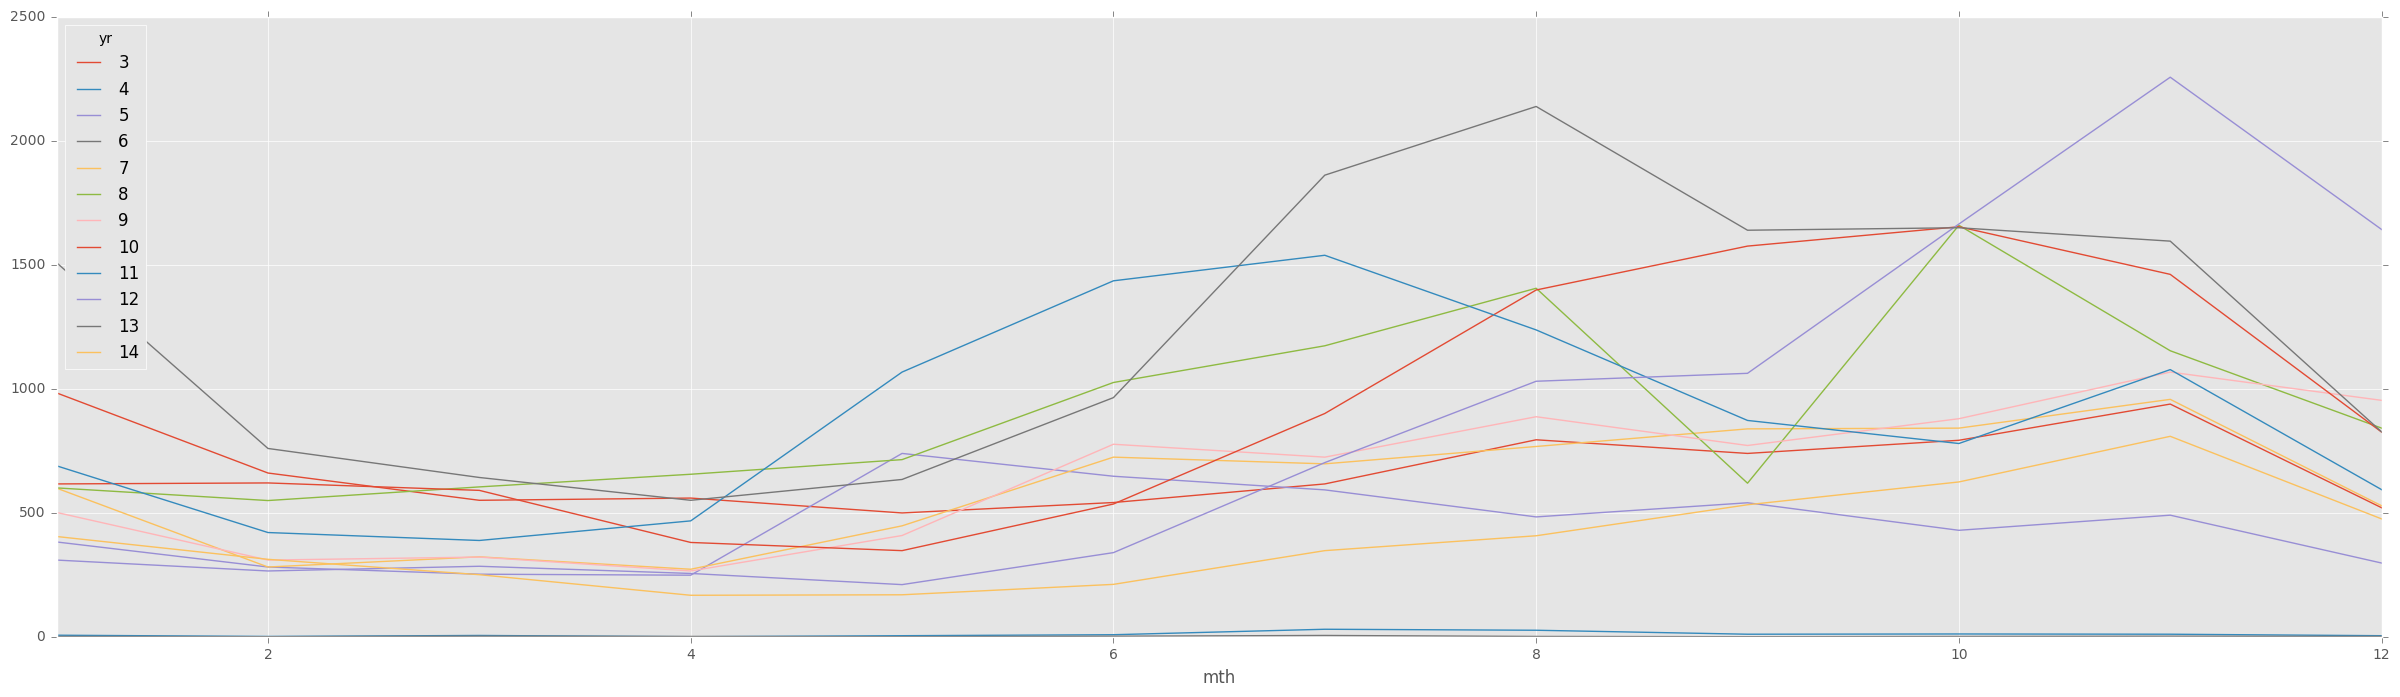

In [38]:
bkk_pivot.plot(figsize=(30,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14fba9ed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x16186fd90>]], dtype=object)

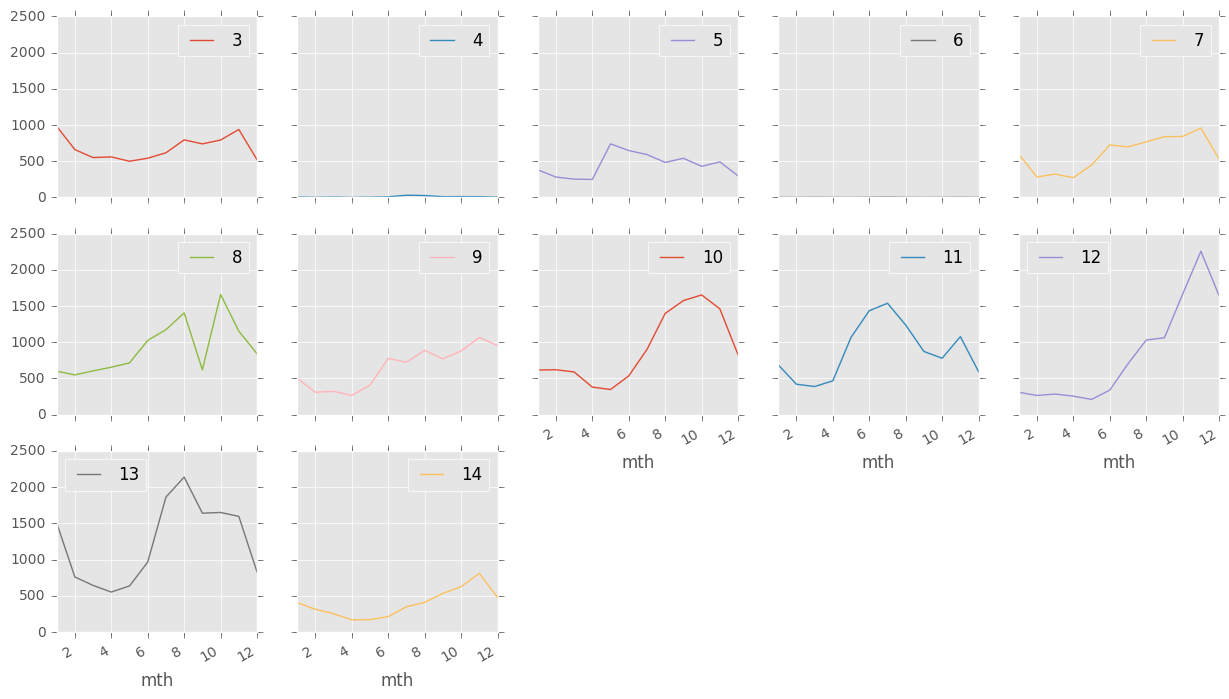

In [39]:
bkk_pivot.plot(subplots = True, figsize=(15, 15), layout=(5, 5), sharey=True)

In [40]:
def simple_seasonal_predictor(year):
    temp = []
    start = 12
#     previous = arr[119]
    n = (year * 12) + 1
    for i in range(n):
        predicted = bkk_df.iloc[start-12].freq + (bkk_df.iloc[start-1].freq - bkk_df.iloc[start-13].freq)
#         previous = predicted
        temp.append(predicted)
        start+=1
    
#     start_mth = datetime.datetime.strptime(start_from, "%Y-%m-%d")
#     date_list = [start_mth + relativedelta(months=x) for x in range(0,n)]
#     return date_list, temp
    return temp



In [41]:
freq = simple_seasonal_predictor(11)

In [42]:
freq = np.array(simple_seasonal_predictor(11))
nans = np.array([0 for i in range(11)])
freq = np.concatenate((nans,freq),axis=0)

bkk_df['prediction'] = pd.Series(freq)

In [43]:
start_mth = datetime.datetime.strptime("2003-01-01", "%Y-%m-%d")
date_list = [start_mth + relativedelta(months=x) for x in range(0,144)]
bkk_df['date'] = pd.Series(date_list)
bkk_df= bkk_df.set_index(bkk_df.date)

### To plot all provinces and its dengue

In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)

#     #Plot rolling statistics:
#     fig = plt.figure(figsize=(30, 8))
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [45]:
# test_stationarity(bkk_df.freq)

In [46]:
test_stationarity(weekly_df.cases)

Results of Dickey-Fuller Test:
Test Statistic                  -5.263205
p-value                          0.000007
#Lags Used                      18.000000
Number of Observations Used    660.000000
Critical Value (5%)             -2.865929
Critical Value (1%)             -3.440297
Critical Value (10%)            -2.569107
dtype: float64


In [47]:
test_stationarity(bkk_df.freq)

Results of Dickey-Fuller Test:
Test Statistic                  -2.120023
p-value                          0.236540
#Lags Used                       7.000000
Number of Observations Used    136.000000
Critical Value (5%)             -2.883037
Critical Value (1%)             -3.479372
Critical Value (10%)            -2.578234
dtype: float64


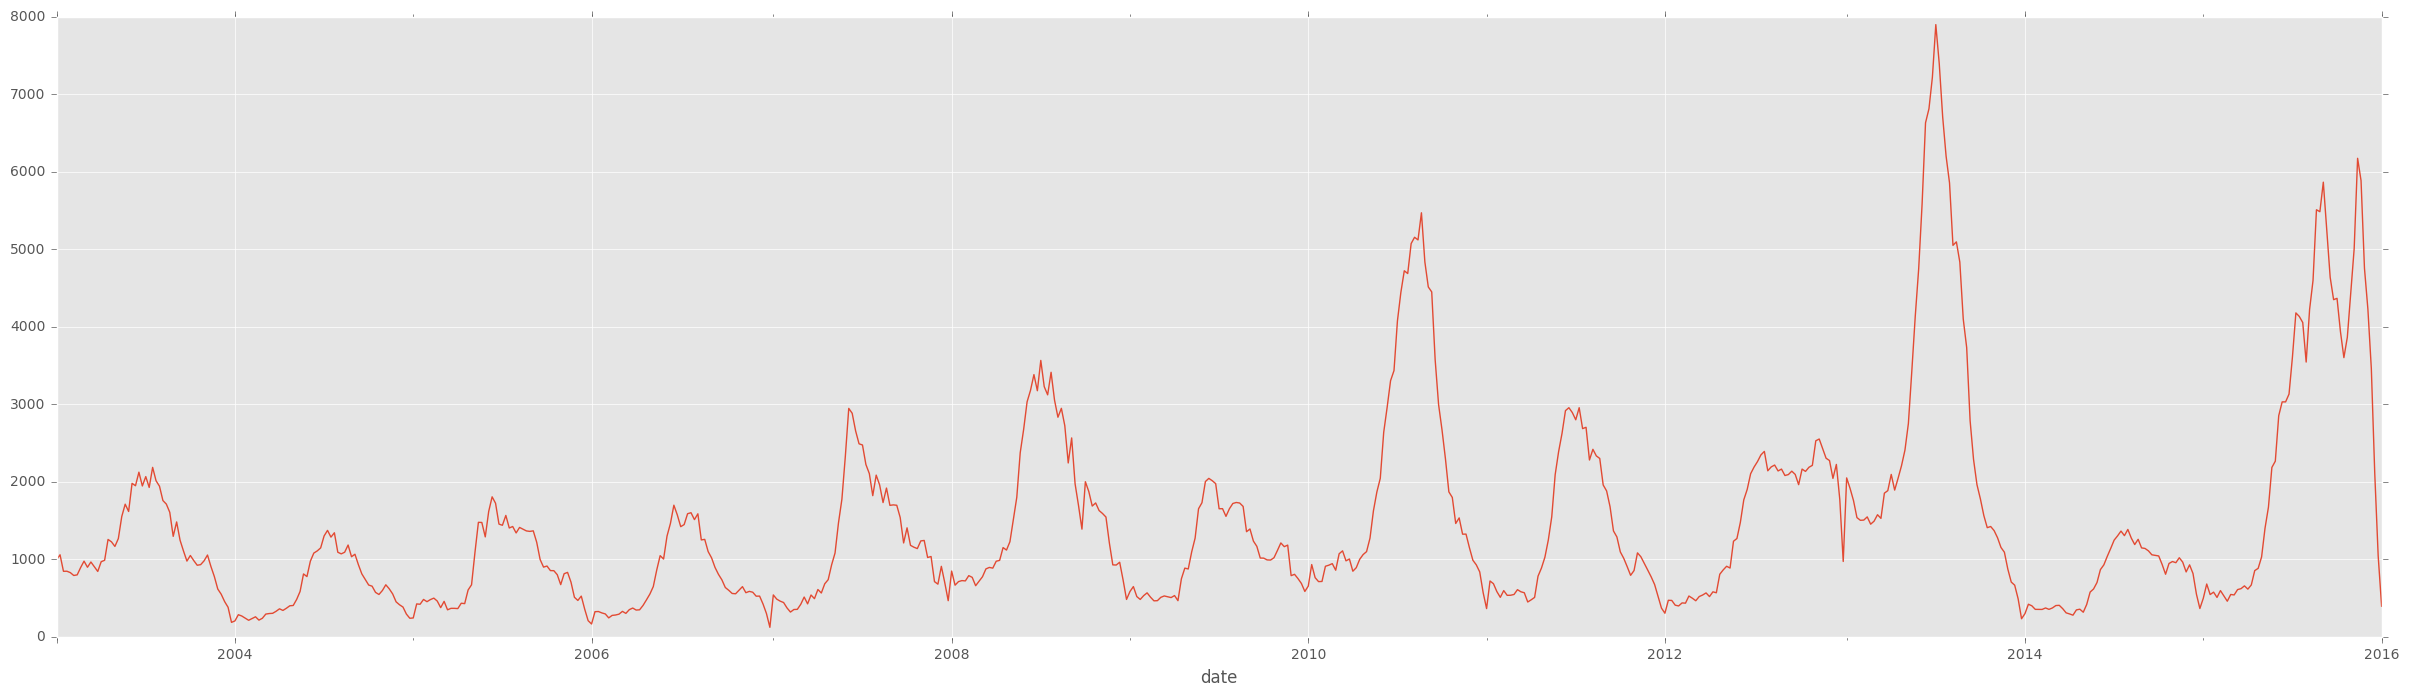

In [48]:
plt.figure(figsize=(30,8))
weekly_df.cases.plot()

## Autocorrelation Function

In [49]:
from statsmodels.tsa.stattools import acf, pacf

In [50]:
# lag_acf = acf(weekly_df.cases, nlags=52*2)
lag_acf = acf(weekly_df.cases, nlags=len(weekly_df.cases)/4)
# lag_pacf = pacf(weekly_df.cases, nlags=52*6, method='ols')

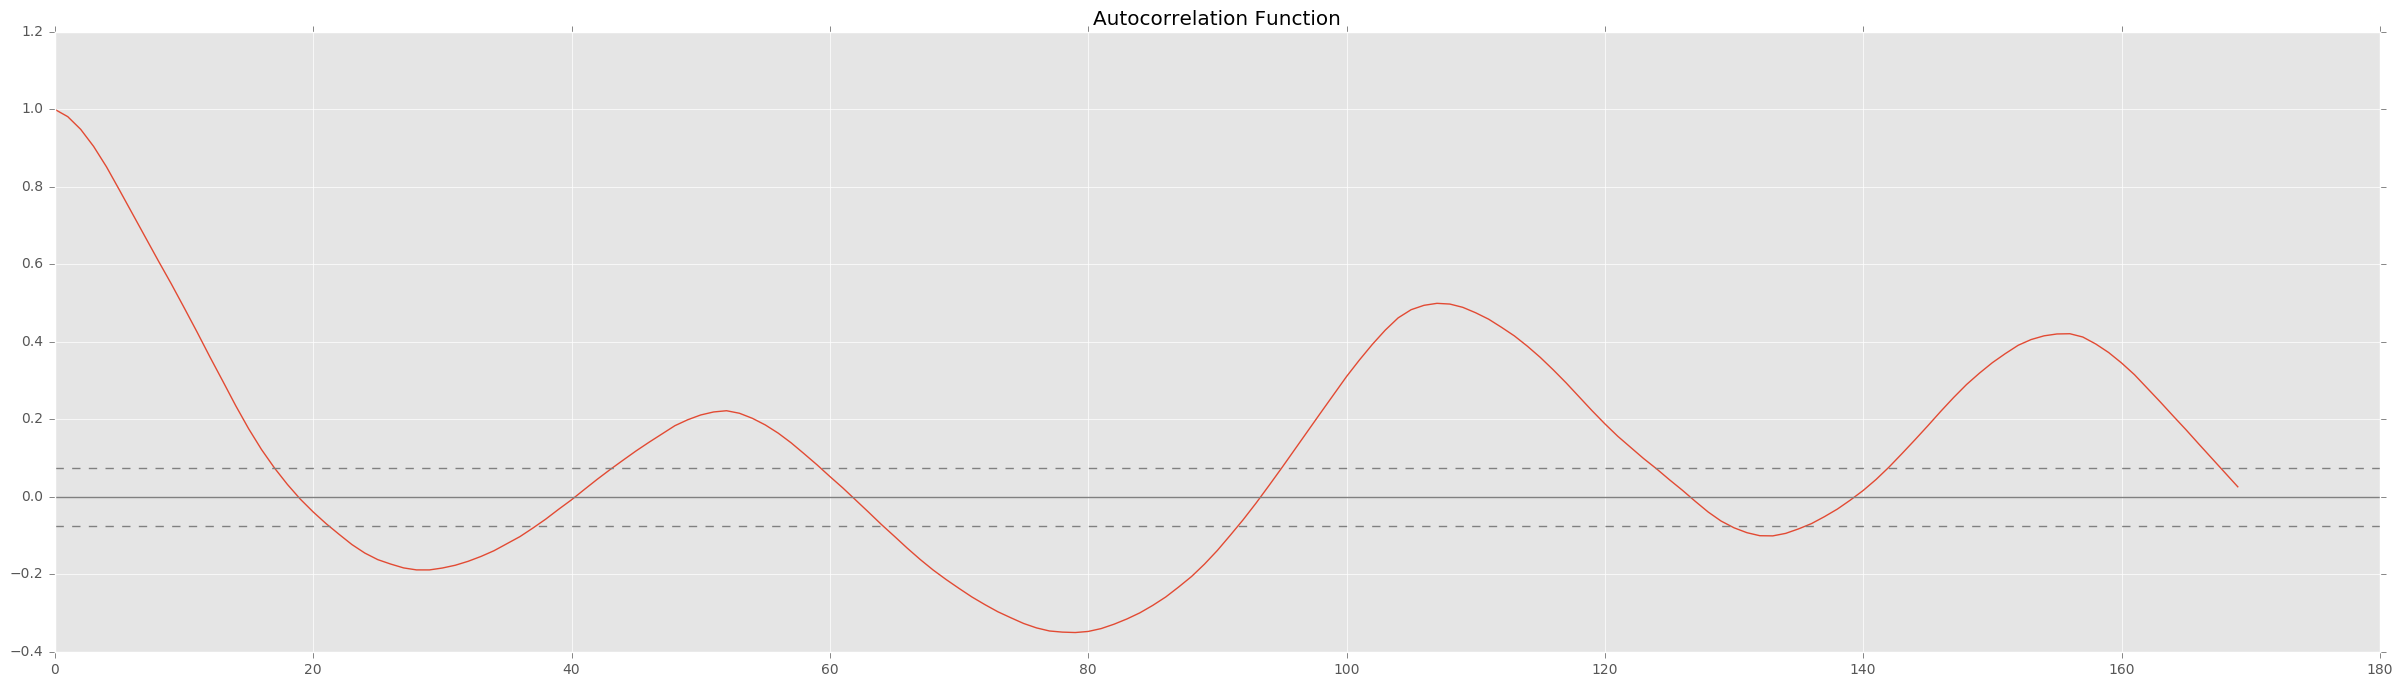

In [51]:
#Plot ACF: 
plt.figure(figsize=(30,8))
plt.plot(lag_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# plt.figure(figsize=(30,8))
# plt.plot(lag_pacf)
# plt.axhline(y=0,color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')

In [52]:
temp = np.array(weekly_df.cases[:2])
temp_N = float(len(weekly_df.cases))
temp_mean = weekly_df.cases.sum() / temp_N

## using 10 weeks prior cases, predict the upcoming week
### only one set of alphas

In [53]:
# # train alpha of only 1 year
# y_cases = weekly_df.cases[209:261]

# def guess(w,x):
#     res = w[0]
#     ws = w[1:]
#     N = len(x)-1
#     for i,ww in enumerate(ws):
#         res += ww*x[N-i]
#     return res
    
# def cost(w):  
#     return sum((y_cases[i+11] - guess(w,y_cases[i:i+10]))**2 \
#                for i in range(len(y_cases)-11))/len(y_cases)


In [221]:
from scipy.optimize import fmin, minimize

def get_alphas(lag,train):
    
    np.random.seed(99)
    arr = np.random.randn(lag)
    
    def guess(w,x):
        res = w[0]
        ws = w[1:]
        N = len(x)-1
        for i,ww in enumerate(ws):
            res += ww*x[N-i]
        return res
    
    def cost(w):  
        return sum((train[i+lag] - guess(w,train[i:i+(lag-1)]))**2 \
               for i in range(len(train)-lag))/len(train)
    
    w = minimize(cost,arr).x
    return w
    
                #int,array,array,string
def make_line(start_week,real,predictions,title,x_axis,y_axis,
              real_legend='Real',predict_legend='Prediction'):
    plt.figure(figsize=(12,6))
    plt.plot([i for i in range(len(real))],np.array(real),'-r',label=real_legend)
    plt.plot([i for i in range(start_week,len(real)+1)],predictions,'-k',label=predict_legend,alpha=0.4)
    plt.axvline(start_week)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend()
    plt.title(title)
    
def guess(w,x):
    res = w[0]
    ws = w[1:]
    N = len(x)-1
    for i,ww in enumerate(ws):
        res += ww*x[N-i]
    return res

In [222]:
# train from previous dengue cases to get alphas
y_cases = weekly_df.cases[209:261]
w_11 = get_alphas(11,y_cases)

In [223]:
# if there's 1 in there and all other values are zeros,
# you are probably minizing your predicted value

w_11

array([  3.59030674e+02,   1.12519097e+00,   1.42229773e-01,
        -1.40693996e-01,  -3.86630795e-01,  -3.09382229e-02,
        -7.97363379e-02,   4.66017102e-02,   4.01299338e-01,
         1.10533321e-02,  -3.46629603e-01])

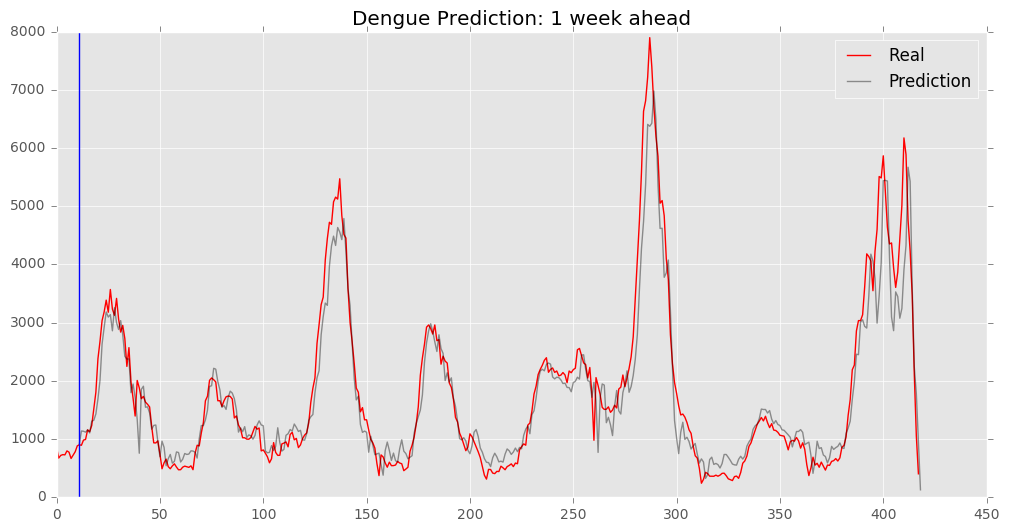

In [224]:
NWEEKS = 10
prediction_1week = []
# 2007 onward
test = weekly_df.cases[261:]
for i in range(len(test)-NWEEKS):
    res = guess(w_11,test[i:i+NWEEKS]) + np.log(63038247)
    prediction_1week.append(res)
    
make_line(11,test,prediction_1week,'Dengue Prediction: 1 week ahead',"","")

## Predict n weeks to the future


### 2-week ahead prediction uses the previous prediction made 1 week ahead to predict the next week

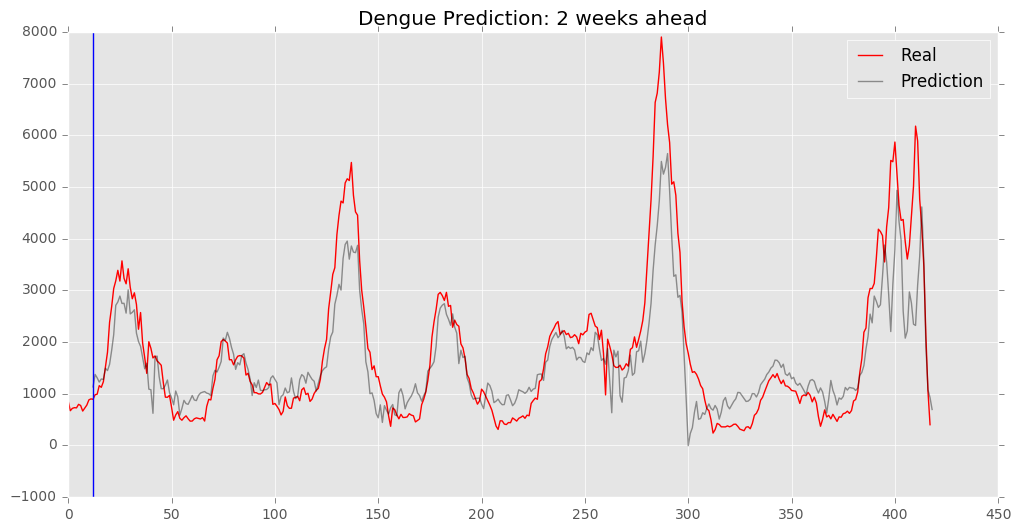

In [225]:
prediction_2week = []
test = weekly_df.cases[261:]
for i in range(len(test)-(NWEEKS+1)):
    first_prediction = guess(w_11,test[i:i+NWEEKS]) #+ np.log(63038247)
    # calculate res by using previous prediction
    arr = np.append(test[i+1:i+(NWEEKS+1)],first_prediction)
    res = guess(w_11,arr) + np.log(63038247)
    prediction_2week.append(res)
    
make_line(12,test,prediction_2week,'Dengue Prediction: 2 weeks ahead',"","")

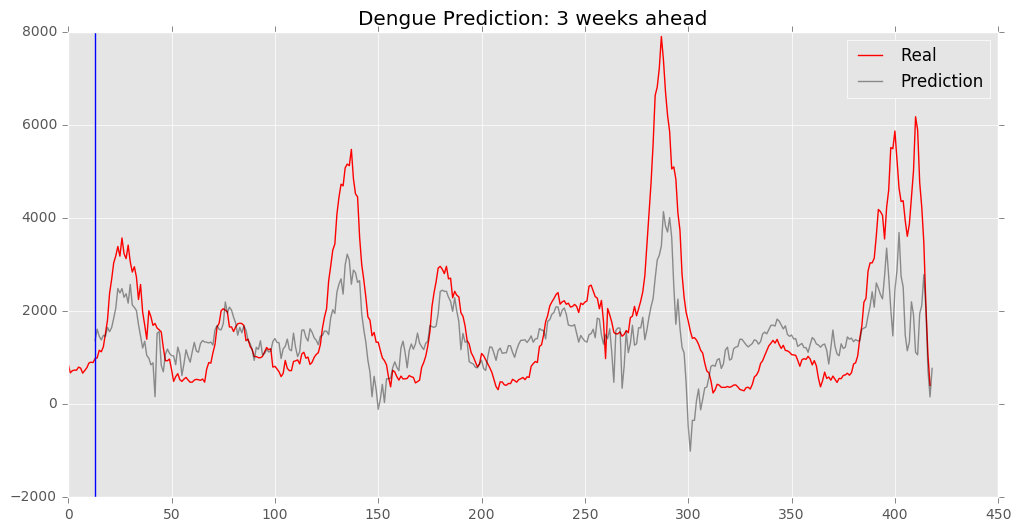

In [226]:
prediction_3week = []
test = weekly_df.cases[261:]
for i in range(len(test)-(NWEEKS+2)):
    first_prediction = guess(w_11,test[i:i+NWEEKS]) #+ np.log(63038247)
    first_arr = np.append(test[i+1:i+(NWEEKS+1)],first_prediction)
    second_prediction = guess(w_11,first_arr)
    second_arr = np.append(first_arr[1:],second_prediction)
    res = guess(w_11,second_arr) + np.log(63038247)
    prediction_3week.append(res)

make_line(13,test,prediction_3week,'Dengue Prediction: 3 weeks ahead',"","")

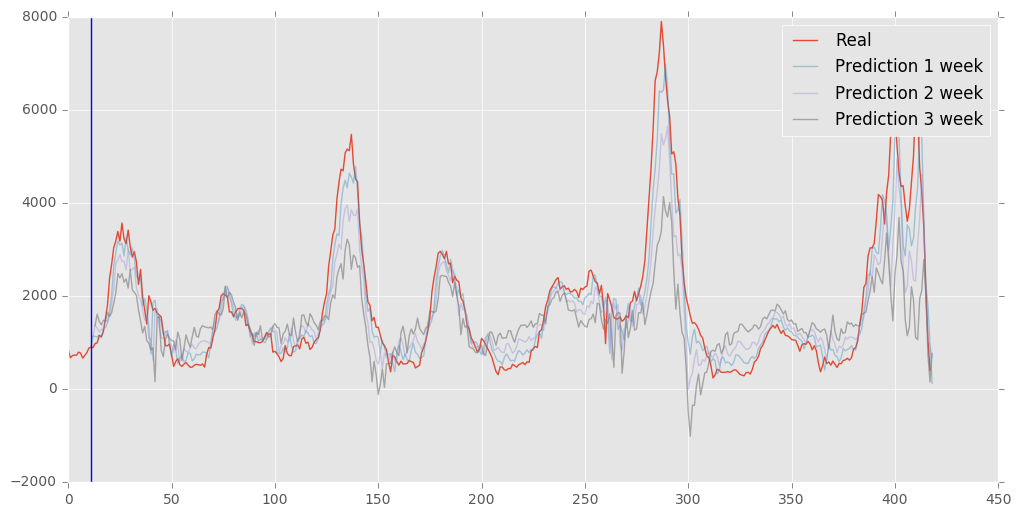

In [227]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),label='Real')
plt.plot([i for i in range(11,len(test)+1)],prediction_1week,label='Prediction 1 week',alpha=0.4)
plt.plot([i for i in range(12,len(test)+1)],prediction_2week,label='Prediction 2 week',alpha=0.4)
plt.plot([i for i in range(13,len(test)+1)],prediction_3week,label='Prediction 3 week',alpha=0.6)
plt.axvline(11)
plt.legend()

In [61]:
# does temperature improve the previous line

In [62]:
# train every 1 year, see whether alpha changes 
# see alpha of every year and plot histogram

In [63]:
# y_cases_27 = 
w_27 = get_alphas(27,y_cases)

In [64]:
len(w_27)

27

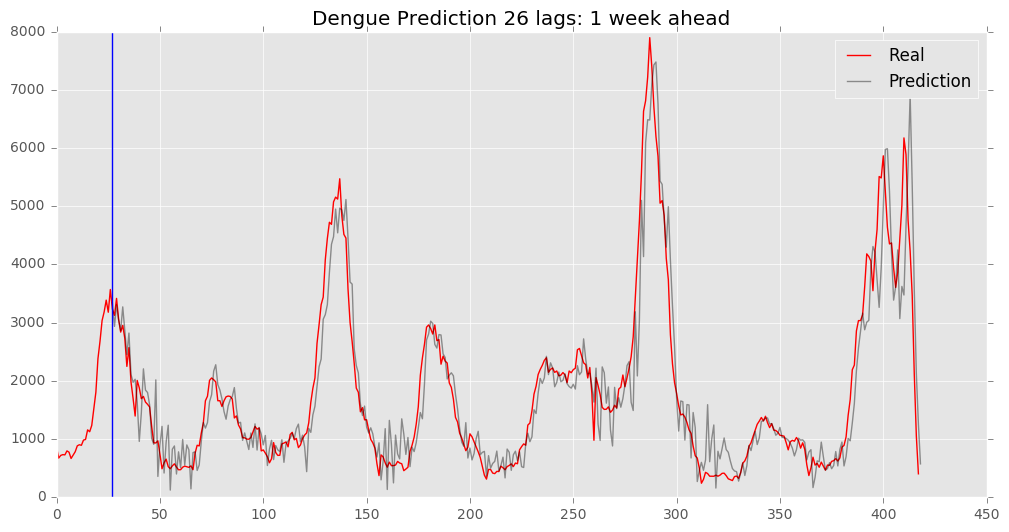

In [65]:
NWEEKS = 26
prediction_26alpha_1week = []
# 2007 onward
test = weekly_df.cases[261:]
for i in range(len(test)-NWEEKS):
    res = guess(w_27,test[i:i+NWEEKS]) + np.log(63038247)
    prediction_26alpha_1week.append(res)

make_line(27,test,prediction_26alpha_1week,'Dengue Prediction 26 lags: 1 week ahead',"","")

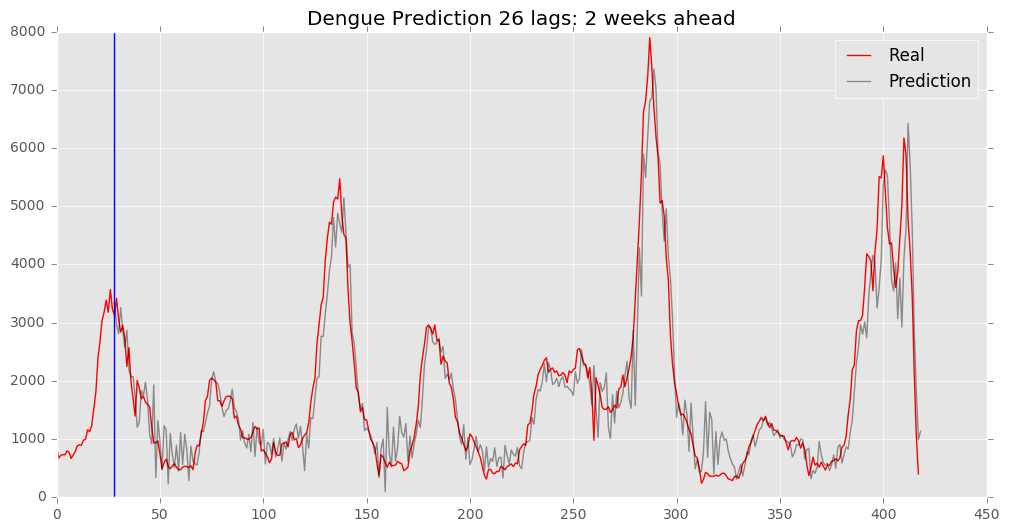

In [66]:
prediction_26alpha_2week = []
# 2007 onward
test = weekly_df.cases[261:]
for i in range(len(test)-(NWEEKS+1)):
    first_prediction = guess(w_27,test[i:i+NWEEKS])
    arr = np.append(test[i+1:i+(NWEEKS+1)],first_prediction)
    res = guess(w_27,arr) + np.log(63038247)
    prediction_26alpha_2week.append(res)
    
make_line(28,test,prediction_26alpha_2week,'Dengue Prediction 26 lags: 2 weeks ahead',"","")

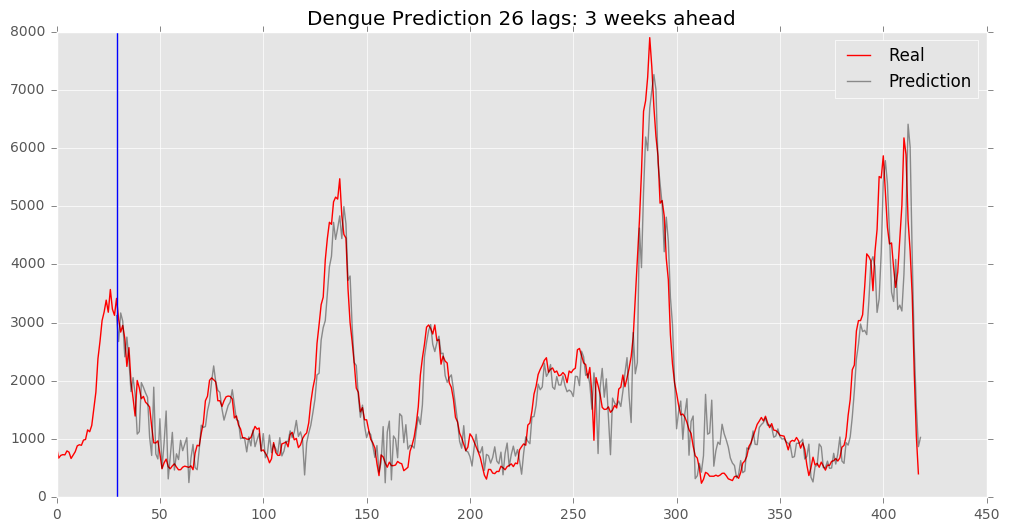

In [67]:
prediction_26alpha_3week = []
test = weekly_df.cases[261:]
for i in range(len(test)-(NWEEKS+2)):
    first_prediction = guess(w_27,test[i:i+NWEEKS]) #+ np.log(63038247)
    first_arr = np.append(test[i+1:i+(NWEEKS+1)],first_prediction)
    second_prediction = guess(w_27,first_arr)
    second_arr = np.append(test[i+2:i+(NWEEKS+2)],second_prediction)
    res = guess(w_27,second_arr) + np.log(63038247)
    prediction_26alpha_3week.append(res)
    
make_line(29,test,prediction_26alpha_3week,'Dengue Prediction 26 lags: 3 weeks ahead',"","")

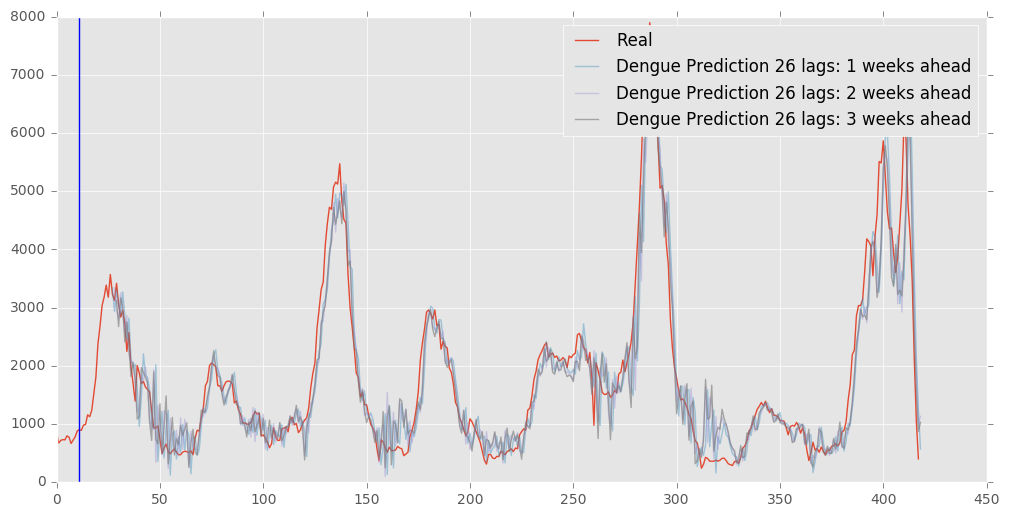

In [68]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),label='Real')
plt.plot([i for i in range(27,len(test)+1)],prediction_26alpha_1week,label='Dengue Prediction 26 lags: 1 weeks ahead',alpha=0.4)
plt.plot([i for i in range(28,len(test)+1)],prediction_26alpha_2week,label='Dengue Prediction 26 lags: 2 weeks ahead',alpha=0.4)
plt.plot([i for i in range(29,len(test)+1)],prediction_26alpha_3week,label='Dengue Prediction 26 lags: 3 weeks ahead',alpha=0.6)
plt.axvline(11)
plt.legend()

### doesn't need to penalize the alphas or performing re since the current model isn't too complex

In [69]:
# weekly_df[weekly_df.date.astype('str').str[:4] == "2009"]
yr = ["200"+str(i) if len(str(i)) < 2 else "20"+str(i) for i in range(7,16)]
each_year = []
for i in yr:
    each_year.append(weekly_df[weekly_df.date.astype('str').str[:4] == i].cases)

In [70]:
# all_alphas = []
# lag = 11
# for year in each_year:
#     alpha_set = get_alphas(lag,year)
#     all_alphas.append(alpha_set)

KeyboardInterrupt: 

In [71]:
# all_alphas_copy = all_alphas
# all_alphas_copy = np.array(all_alphas_copy).T


In [72]:
# a = pd.DataFrame(all_alphas_copy,columns=yr)

ValueError: Shape of passed values is (3, 11), indices imply (9, 11)

In [ ]:
# alphas_compare = a[1:].plot.bar(figsize=(12,8))
# alphas_compare.set_xlabel("alpha #")
# alphas_compare.set_ylabel("values")

In [ ]:
# 26 alphas for 1-year rolling window and draw 26 histogram

In [ ]:
chosen_date = weekly_df[(weekly_df.date.astype('str').str[:4] > "2006") &
                        (weekly_df.date.astype('str').str[:4] < "2016")].cases

def set_of_alphas(arr,lag):
    ls_ = []
    for i in range(len(arr)-52):
        if i < 50:
            print i
            period = arr[i:i+52]
            alphas_set = get_alphas(lag,period)
            ls_.append(alphas_set)
    return ls_

# all_alphas = set_of_alphas(chosen_date,27)

In [ ]:
all_alphas_copy = all_alphas
all_alphas_copy = np.array(all_alphas_copy)
all_alphas_copy = pd.DataFrame(all_alphas_copy)
all_alphas_copy.columns = ["a_"+str(i) for i in range(27)]

In [ ]:
# all_alphas_copy.to_csv("alphas-set.csv")

In [73]:
def make_hist(arr,idx):
    plt.hist(arr.iloc[:,idx],bins=30)
    plt.title('alpha # %d'%(idx-1))
    plt.show()
    plt.figure()

In [74]:
for i in range(1,27):
    make_hist(all_alphas_copy,i)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
all_alphas_copy.plot.box(figsize=(16,7))
plt.title("Alpha Values")

In [ ]:
# write physical motivation too

## Logistic Function
used to compress unbound range of alphas [0,1]

In [75]:
all_alphas_copy = pd.read_csv("alphas-set.csv")
all_alphas_copy.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,0,-0.209261,0.394106,0.976167,0.044328,-0.387269,-0.122699,-0.188368,-0.115595,0.621486,...,-0.163341,0.596524,-0.620870,0.349612,0.620330,-0.964211,0.576192,-0.420222,-0.363209,0.585562
1,1,-0.098816,-0.139536,0.850144,0.527908,0.173553,-0.229361,-0.609442,0.130165,0.278383,...,0.109922,-0.052727,-0.273600,0.788373,-0.249091,-0.321269,0.943297,-1.331590,0.127440,0.447870
2,2,-0.132162,-0.147872,0.924850,0.472260,-0.053689,-0.294158,-0.475955,0.321336,0.171256,...,0.179368,-0.150273,-0.059967,0.600438,-0.336933,-0.058389,0.728795,-1.390082,0.439127,0.268195
3,3,-0.156232,0.233311,0.694913,0.541760,-0.348236,0.258548,-0.584383,0.225550,-0.082164,...,0.414364,-0.291568,0.143260,0.107974,0.324844,-0.444241,0.586008,-0.940462,0.091818,0.372408
4,4,-0.096915,1.099915,1.435426,0.618451,-0.561899,-0.163512,0.058195,-0.260659,-0.283214,...,0.076005,0.265632,-0.157184,0.423643,-0.064254,0.119846,0.039090,-0.983886,0.109141,0.603741


In [ ]:
# for i in range(1,27):
#     make_hist(all_alphas_copy,i+1)

- use sigmoid to compress the unbound range of alphas to [0,1]
- find w to minimize error by using least square

In [ ]:
# def guess(w,x):
#     res = w[0]
#     ws = w[1:]
#     N = len(x)-1
#     for i,ww in enumerate(ws):
#         res += ww*x[N-i]
#     return res
    
# def cost(w):  
#     return sum((y_cases[i+11] - guess(w,y_cases[i:i+10]))**2 \
#                for i in range(len(y_cases)-11))/len(y_cases)

# w = minimize(cost,[0]*n).x

In [76]:
np.mean(weekly_df.cases[209:261])

1231.173076923077

$$\theta\,(w_{i}\cdot x_{i}) = \frac{1}{1\,+\,e^{-\sum_{i=0}^{n} w_{i} x_{i}}}$$

$$\log cases = \log pop. + \log\,\theta(w\cdot x) \,+\, ...$$

x should be padded, so that the beta 0 is a vertical shift of graph

there will always be one more betas count than x data 

In [206]:
from scipy.special import expit
log_train_cases = np.log(weekly_df.cases[209:261])
train_cases = weekly_df.cases[209:261]
LAG = 26
BETAS_SET = LAG + 1

def guess_log(w,x):
    def theta(w,x):
        ret = w[0] # pad
        for i,ww in enumerate(w[1:]):
            ret += ww*x[i]
        logistic = expit(ret)
#         print logistic, ret
        return logistic
    return  np.log(theta(w,x)+1e-9)  + np.log(7500.) # avoid precision error by using 3*mean

all_ws = []
see_true_pred = []
def cost_log(w): # np.log(63038247) population
    
    n_case = len(train_cases)
    ret = 0
    for idx in range(n_case-BETAS_SET): #why
        true_cases = log_train_cases[idx+BETAS_SET]
        predicted_cases = guess_log(w,train_cases[idx:idx+LAG])
        # print to file
        see_true_pred.append([idx,true_cases,predicted_cases])
        ret += (true_cases - predicted_cases)**2
    all_ws.append(w)
    print 'ret',ret/float(n_case)
    return ret/float(n_case)

# return sum((train[i+lag] - guess(w,train[i:i+(lag-1)]))**2 \
#                for i in range(len(train)-lag))/len(train)

# 26 betas; the first beta is allocated to shifting of graph
temp = [0]*(BETAS_SET)
res = minimize(cost_log,temp)
# print res

ret 0.625919417577
ret 0.625919425232
ret 0.62592892519
ret 0.625929698417
ret 0.625930421121
ret 0.625930899392
ret 0.625931326526
ret 0.625931596765
ret 0.625932086902
ret 0.62593247091
ret 0.625932701245
ret 0.625933050787
ret 0.625933232998
ret 0.62593338394
ret 0.625933516022
ret 0.625933520402
ret 0.625933315914
ret 0.625933335977
ret 0.625933152552
ret 0.625932967936
ret 0.625932764283
ret 0.625932643039
ret 0.625932441962
ret 0.625932062597
ret 0.625931650762
ret 0.625930978712
ret 0.625930323198
ret 0.625929898441
ret 0.625919417577
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
ret 172.932936906
re

In [209]:
res.x

array([  5.35930240e-05,   6.21305628e-04,  -5.76688206e-04,
         1.30231837e-03,  -1.62656141e-03,  -1.48428715e-03,
         2.42774154e-03,  -1.39250086e-03,  -5.88275248e-04,
         2.23131405e-03,  -1.10162991e-03,  -2.22819185e-05,
        -4.45512233e-04,   3.99678816e-04,  -3.51164916e-04,
         6.88162124e-04,  -4.37845055e-04,  -1.33818511e-03,
         3.48009083e-04,   1.34054338e-03,  -6.81837526e-04,
         4.17198866e-04,  -1.40934729e-03,  -2.75971675e-03,
        -4.81925043e-04,   2.58764835e-03,   1.96300992e-03])

In [210]:
res

      fun: 4.218002188839414e-08
 hess_inv: array([[  1.00012675e+00,   1.93340554e-03,  -2.23250039e-03,
          4.67243143e-03,  -3.88982580e-03,  -3.23251921e-03,
          5.34617527e-03,  -4.08814186e-03,   3.08907654e-04,
          3.41870107e-03,  -1.28599371e-03,  -1.23459543e-04,
         -5.91872237e-04,   2.88188401e-04,   8.32796591e-05,
          3.06788160e-04,   4.61126942e-04,  -3.74168902e-03,
          1.38247116e-03,   1.95710708e-03,  -6.44734352e-04,
          7.21760389e-04,  -2.20841201e-03,  -6.37844981e-03,
         -4.60015416e-04,   3.28793403e-03,   5.58394526e-03],
       [  1.93340554e-03,   5.55211642e-02,  -6.18454479e-02,
          1.21540637e-01,  -9.75711603e-02,  -8.73207331e-02,
          1.41418544e-01,  -1.06352523e-01,   9.87113393e-03,
          8.63785688e-02,  -3.03320337e-02,  -4.37714513e-03,
         -1.40451428e-02,   6.07579644e-03,   4.69400834e-03,
          5.10998737e-03,   1.52477920e-02,  -9.78595763e-02,
          3.68834990e-02,

In [195]:
# pd.DataFrame(np.array(see_true_pred)).to_csv("temp.csv")
# pd.DataFrame(np.array(all_ws)).to_csv("all-ws.csv")

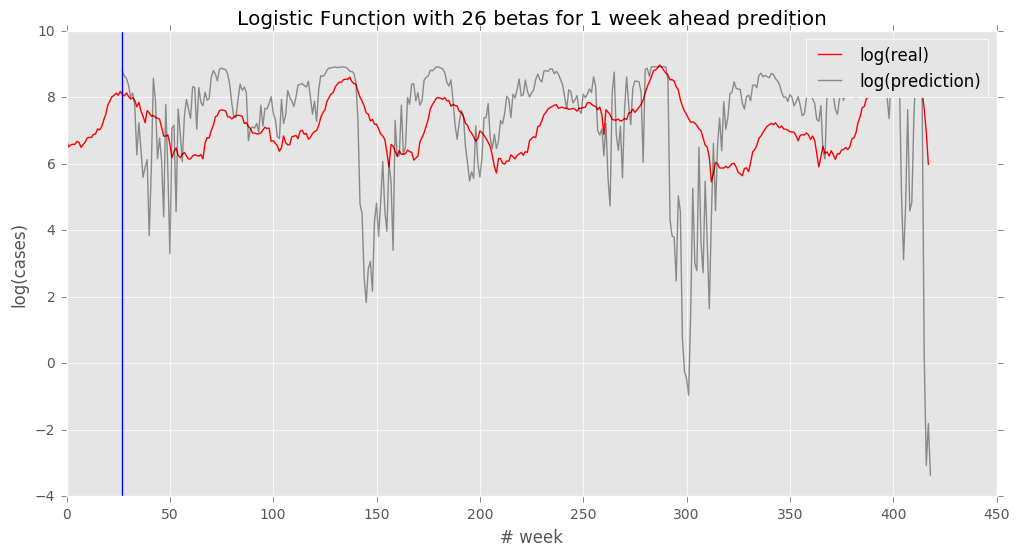

In [213]:
ls_ = []
# 2007 onward

log_test_cases = np.log(weekly_df.cases[261:])
test_cases = weekly_df.cases[261:]

for i in range(len(test_cases)-LAG):
    result = guess_log(res.x,test_cases[i:i+LAG])
    ls_.append(result)

make_line(27,log_test_cases,ls_,'Logistic Function with 26 betas for 1 week ahead predition',
          "# week","log(cases)",'log(real)','log(prediction)')

In [214]:
ls_

[8.7743129216194706,
 8.6483243362360138,
 8.571325629774698,
 8.363619603863345,
 8.0060578019737623,
 8.1331749401350919,
 7.7482104809796777,
 6.2681571171684753,
 7.242707893318701,
 6.4291550893967706,
 5.5969009690077449,
 5.8924047296338333,
 6.127339600733424,
 3.8414058471154071,
 5.8150941922942856,
 8.5706400263482987,
 7.8940220761735933,
 6.1485333591308979,
 6.779140463084401,
 6.0768019227427068,
 4.4067380293683271,
 7.7815574346527274,
 5.825340867697137,
 3.2877420587261046,
 7.0724993205626507,
 7.1651952129760934,
 4.5521822786362094,
 7.6441291759775538,
 6.9268548371912093,
 6.0646935678943965,
 7.4177531223342665,
 7.9391341421933399,
 7.6526401149527503,
 7.3653147907610705,
 8.3205799395782396,
 8.2980132141293481,
 7.0480383830271212,
 8.2959778463092206,
 7.8494236965007804,
 7.750248868311334,
 8.1565928770965037,
 7.9190968267047799,
 7.9615520307433592,
 8.5943848717730411,
 8.8046927521600313,
 8.7074451135083102,
 8.4999805815533236,
 8.8458386756161751,

In [132]:
expit?

In [ ]:
plt.plot(test_cases)
# plt.plot(np.exp(ls_))

In [185]:
a = [1,2,3,4,5,6,7,8,9]
nn = len(a)
for i in range(nn-4):
    print a[i:i+4]

[1, 2, 3, 4]
[2, 3, 4, 5]
[3, 4, 5, 6]
[4, 5, 6, 7]
[5, 6, 7, 8]
